<a href="https://colab.research.google.com/github/fahmisyuhada/Klasifikasi-tulisan-tangan-huruf-aksara-sasak-cnn/blob/main/run2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/fahmisyuhada/Klasifikasi-tulisan-tangan-huruf-aksara-sasak-cnn.git projek
import zipfile

data_set = zipfile.ZipFile('projek/character_with_bouding_box.zip', 'r')

data_set.extractall()
data_set.close()
print('dataset unzip successfully')

Cloning into 'projek'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 3.98 MiB | 7.27 MiB/s, done.
Resolving deltas: 100% (6/6), done.
dataset unzip successfully


In [6]:
import numpy as np
np.random.seed

import cv2
import os
from PIL import Image
import keras

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

os.environ['KERAS_BACKEND'] = 'tensorflow'

image_directory = 'karakter3/'
SIZE = 64
dataset = []
label = []

karakter = [['ha',0], ['na',1], ['ca',2], ['ra',3], ['ka',4],
 ['da',5], ['ta',6], ['sa',7], ['wa',8], ['la',9],
  ['ma',10], ['ga',11], ['ba',12], ['nga',13], ['pa',14],
   ['ja',15], ['ya',16], ['nya',17]]

for char in karakter:
  for i, image_name in enumerate(os.listdir(image_directory + char[0] + '/')):
    if(image_name.split('.')[1] == 'jpeg'):
      image = cv2.imread(image_directory + char[0] + '/' + image_name)
      image = Image.fromarray(image, 'RGB')
      image = image.resize((SIZE, SIZE))
      dataset.append(np.array(image))
      label.append(char[1])


In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.1, random_state = 1)

In [8]:
###########################################
### Second : Using Sequential model #######
#Sequential
#You can create a Sequential model by passing a list of layer instances to the constructor:

from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

model = None
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=18))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 31, 31, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)       

In [14]:
#import datetime

#log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d_%H%M%S") + "/"
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# ### Training the model
# As the training data is now ready, I will use it to train the model.

#Fit the model
history = model.fit(np.array(X_train),
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 25,      #Changed to 3 from 50 for testing purposes.
                         validation_split = 0.1,
                         shuffle = False
                     )

# ## Accuracy calculation
#
# I'll now calculate the accuracy on the test data.


Epoch 1/25
16/16 [==============================] - 6s 378ms/step - loss: 0.3159 - accuracy: 0.9142 - val_loss: 1.9631 - val_accuracy: 0.4595
Epoch 2/25
16/16 [==============================] - 5s 298ms/step - loss: 0.2040 - accuracy: 0.9324 - val_loss: 1.5864 - val_accuracy: 0.5676
Epoch 3/25
16/16 [==============================] - 5s 283ms/step - loss: 0.1152 - accuracy: 0.9707 - val_loss: 6.7562 - val_accuracy: 0.3243
Epoch 4/25
16/16 [==============================] - 6s 410ms/step - loss: 0.0420 - accuracy: 0.9929 - val_loss: 7.3081 - val_accuracy: 0.3333
Epoch 5/25
16/16 [==============================] - 7s 416ms/step - loss: 0.0287 - accuracy: 0.9950 - val_loss: 1.9207 - val_accuracy: 0.5766
Epoch 6/25
16/16 [==============================] - 6s 384ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.4808 - val_accuracy: 0.8649
Epoch 7/25
16/16 [==============================] - 5s 321ms/step - loss: 0.0094 - accuracy: 0.9990 - val_loss: 0.5642 - val_accuracy: 0.8378
Epoch 

In [15]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

4/4 [==============================] - 0s 86ms/step - loss: 0.4788 - accuracy: 0.8943
Test_Accuracy: 89.43%


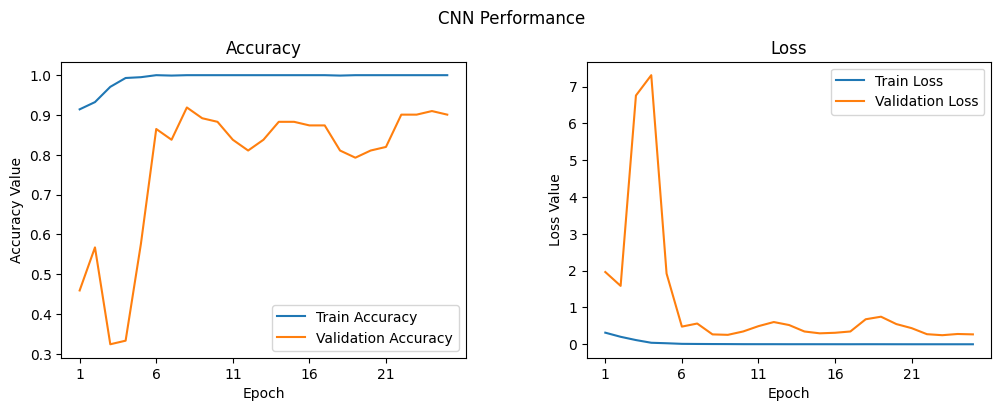

In [16]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")